In [67]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

treat_NaNs = [" ","",".","-","._",",",";",":","''","'","/","?","!","[]","#",
"´","&","$","()","{}","ç","Ç","`","^","*","+","|","%","n/a","N/A","--","NA","na"]
df = pd.read_excel(r'C:\Users\usuario\OneDrive\Escritorio\TheEgg_ai\tarea_177\ejercicio_Missing_values.xlsx', na_values=treat_NaNs)
df.isnull().sum()

Nombre                             2
Apellido 1                         2
Apellido 2                         2
Sexo                               3
Municipio                          5
Provincia                          4
NIF                               11
Edad                               2
Estatura                          12
Masa                              13
Hijos                              6
Ingresos                           7
Estado Civil                       8
Vacunadx                           5
CARNÉ CONDUCIR                    10
Consumidorx Alcohol Esporádico    43
REFERENCIA ESTUDIO                 5
dtype: int64

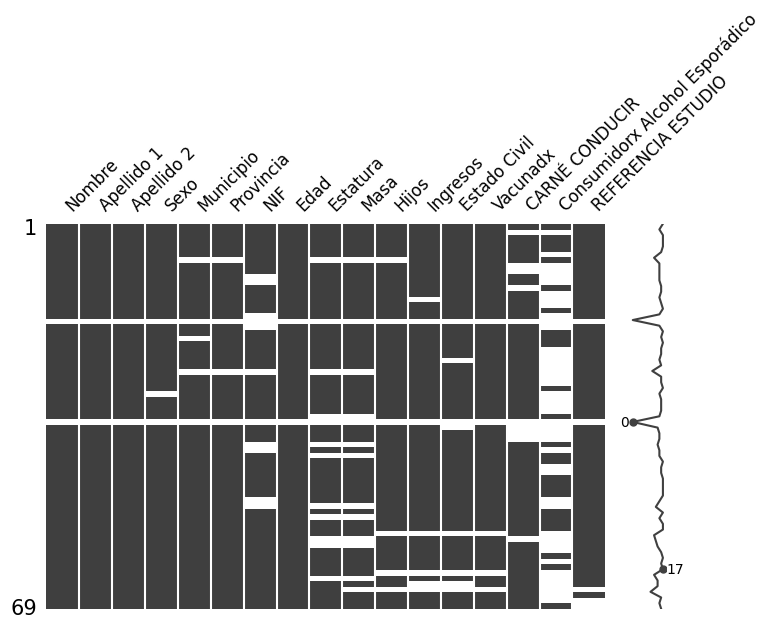

In [33]:

msno.matrix(df,figsize=(8,5), fontsize=12);

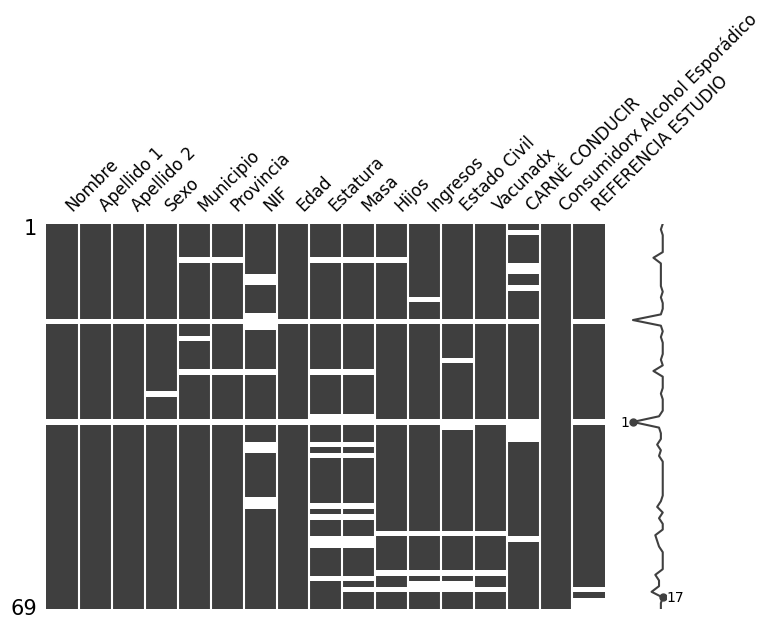

In [34]:
df["Consumidorx Alcohol Esporádico"] = df["Consumidorx Alcohol Esporádico"].fillna("NO")
msno.matrix(df,figsize=(8,5), fontsize=12);


,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,73534066F,22.0,160.0,65.0,NO,1200.000000,Solter/x,SI,NaN,NO,4411125322A
6,Rosa,Cano,Gómez,M,NaN,NaN,39455398W,55.0,NaN,NaN,NaN,2100.000000,Divorciad/x,No,SÍ,SÍ,4411125322A
7,Sebastián,Caparros,Sánchez,H,Madrid,Madrid,06708146N,78.0,165.0,66.0,SÍ,2150.000000,Divorciad/x,No,NaN,NO,4411125322A
8,Antonio,Morante,Molina,H,Candelaria,S.C. de Tenerife,35261507M,110.0,145.0,70.0,SÍ,2312.500000,Solter/x,SI,NaN,NO,4411125322A
9,Jesús,López,Núñez,H,Cartagena,Murcia,NaN,2.0,88.0,13.0,NO,0.000000,Solter/x,SI,NO,NO,4411125322A
10,Juan,Sanz,Hernández,H,Rentería,Guipúzcoa,NaN,22.0,165.0,72.0,SÍ,950.000000,Solter/x,SI,SÍ,NO,4411125322A
11,Jordi,Martínez,Valdés,H,Marín,Pontevedra,35614346V,22.0,163.0,70.0,NO,900.000000,Divorciad/x,No,NaN,SÍ,4411125322A
13,José Luis,Romero,Busto,H,San Sebastián,Guipúzcoa,79455398W,45.0,171.0,60.0,SÍ,NaN,Solter/x,No,SÍ,NO,4411125322A
16,José,López,Doncel,H,San Vicente del Raspeig,Alicante,NaN,5.0,110.0,18.0,NO,0.000000,Solter/x,No,NO,NO,4411125322A
18,Alejandro,León,Herranz,H,Barcelona,Barcelona,NaN,18.0,188.0,89.0,SÍ,1812.000000,Solter/x,No,NO,NO,4411125322A


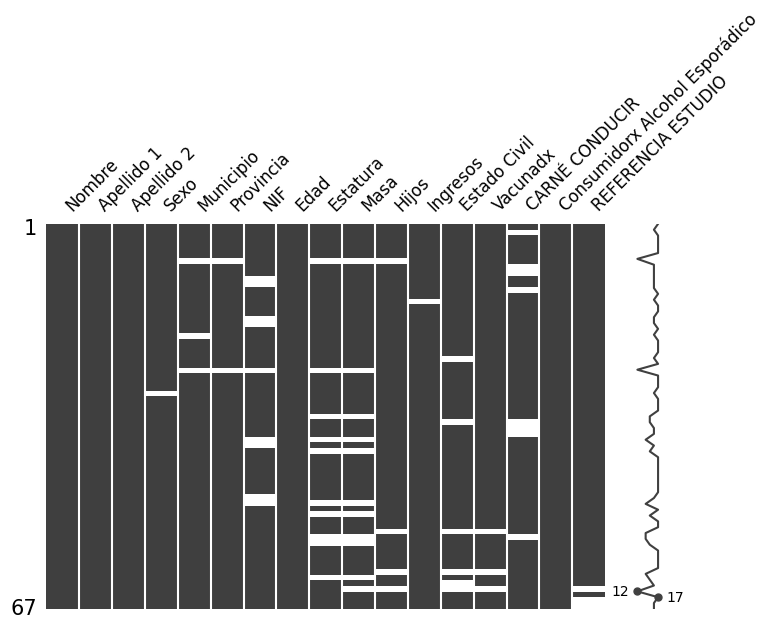

In [35]:
df = df[(pd.notnull(df["Nombre"])) & (pd.notnull(df["Apellido 1"]))]
condicion = (pd.isnull(df["Ingresos"])) & (df["Edad"]<13)
df.loc[condicion, "Ingresos"] = 0
msno.matrix(df,figsize=(8,5), fontsize=12);
df[df.isna().any(axis = 1)]

In [37]:
sueldo = df[df["Edad"] >20]["Ingresos"].mean()
df.loc[13, "Ingresos"] = sueldo
df.isnull().sum()

Nombre                             0
Apellido 1                         0
Apellido 2                         0
Sexo                               1
Municipio                          3
Provincia                          2
NIF                                9
Edad                               0
Estatura                          10
Masa                              11
Hijos                              4
Ingresos                           0
Estado Civil                       6
Vacunadx                           3
CARNÉ CONDUCIR                     8
Consumidorx Alcohol Esporádico     0
REFERENCIA ESTUDIO                 3
dtype: int64

In [38]:
condicion = (df["Edad"] < 16) & (df["Estado Civil"].isna())
df.loc[condicion, "Estado Civil"] = "Solter/x"
df.isnull().sum()

Nombre                             0
Apellido 1                         0
Apellido 2                         0
Sexo                               1
Municipio                          3
Provincia                          2
NIF                                9
Edad                               0
Estatura                          10
Masa                              11
Hijos                              4
Ingresos                           0
Estado Civil                       0
Vacunadx                           3
CARNÉ CONDUCIR                     8
Consumidorx Alcohol Esporádico     0
REFERENCIA ESTUDIO                 3
dtype: int64

In [41]:
condicion2 = (df["Masa"].isna()) & (df["Estatura"].isna())
indices_a_eliminar = df[condicion2].index
df = df.drop(indices_a_eliminar)
df["Masa"] = df["Masa"].fillna(8.0) #Podemos pensar que una persona que mide 86 cm puede pesar 8 kg.
df.isnull().sum()


Nombre                            0
Apellido 1                        0
Apellido 2                        0
Sexo                              1
Municipio                         1
Provincia                         0
NIF                               6
Edad                              0
Estatura                          0
Masa                              0
Hijos                             3
Ingresos                          0
Estado Civil                      0
Vacunadx                          3
CARNÉ CONDUCIR                    7
Consumidorx Alcohol Esporádico    0
REFERENCIA ESTUDIO                3
dtype: int64

In [47]:
# Vamos a eliminar las filas en las que falta el NIF, ya que no podemos intuir ese dato
df = df.dropna(subset=["NIF"])
print(df.shape)
df.isnull().sum()

(51, 17)


Nombre                            0
Apellido 1                        0
Apellido 2                        0
Sexo                              1
Municipio                         1
Provincia                         0
NIF                               0
Edad                              0
Estatura                          0
Masa                              0
Hijos                             3
Ingresos                          0
Estado Civil                      0
Vacunadx                          3
CARNÉ CONDUCIR                    7
Consumidorx Alcohol Esporádico    0
REFERENCIA ESTUDIO                3
dtype: int64

In [48]:
condicion3 = (df["Edad"]<18) & (df["Hijos"].isna())
indices_a_eliminar2 = df[condicion3].index
df = df.drop(indices_a_eliminar2)
df.isnull().sum()

Nombre                            0
Apellido 1                        0
Apellido 2                        0
Sexo                              1
Municipio                         1
Provincia                         0
NIF                               0
Edad                              0
Estatura                          0
Masa                              0
Hijos                             0
Ingresos                          0
Estado Civil                      0
Vacunadx                          0
CARNÉ CONDUCIR                    7
Consumidorx Alcohol Esporádico    0
REFERENCIA ESTUDIO                2
dtype: int64

In [53]:
df["CARNÉ CONDUCIR"] = df["CARNÉ CONDUCIR"].fillna("NO")
df["REFERENCIA ESTUDIO"] = df["REFERENCIA ESTUDIO"].fillna("4411125322A")
df.loc[30, "Sexo"] = "M"
df.isnull().sum()

Nombre                            0
Apellido 1                        0
Apellido 2                        0
Sexo                              0
Municipio                         1
Provincia                         0
NIF                               0
Edad                              0
Estatura                          0
Masa                              0
Hijos                             0
Ingresos                          0
Estado Civil                      0
Vacunadx                          0
CARNÉ CONDUCIR                    0
Consumidorx Alcohol Esporádico    0
REFERENCIA ESTUDIO                0
dtype: int64

In [61]:
df[df["Municipio"].isna()]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
20,Concepción,Cobos,Díaz,M,NaN,Madrid,81971380R,56.0,156.0,49.0,NO,1325.0,Casad/x,No,NO,SÍ,4411125322A


In [62]:
df["Municipio"] = df["Municipio"].fillna("Madrid")

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
0,José,Maza,Redondo,H,Madrid,Madrid,61025400Y,22.0,156.0,60.0,NO,1000.000000,Solter/x,SI,SÍ,SÍ,4411125322A
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,73534066F,22.0,160.0,65.0,NO,1200.000000,Solter/x,SI,NO,NO,4411125322A
2,Pablo,Gálvez,González,H,Talavera de la Reina,Toledo,10223810K,23.0,177.0,70.0,NO,1325.000000,Casad/x,SI,SÍ,SÍ,4411125322A
3,María,Gallego,Martínez,M,Sevilla,Sevilla,32770305C,45.0,172.0,89.0,NO,1500.000000,Solter/x,No,NO,SÍ,4411125322A
4,José Luis,Fernández,Ortega,H,Oviedo,Asturias,04614346V,37.0,179.0,82.0,SÍ,1662.500000,Solter/x,No,NO,SÍ,4411125322A
5,Manuel,García,Muñoz,H,Madrid,Madrid,81971380R,59.0,188.0,122.0,SÍ,1825.000000,Divorciad/x,No,NO,NO,4411125322A
6,Sebastián,Caparros,Sánchez,H,Madrid,Madrid,06708146N,78.0,165.0,66.0,SÍ,2150.000000,Divorciad/x,No,NO,NO,4411125322A
7,Antonio,Morante,Molina,H,Candelaria,S.C. de Tenerife,35261507M,110.0,145.0,70.0,SÍ,2312.500000,Solter/x,SI,NO,NO,4411125322A
8,Jordi,Martínez,Valdés,H,Marín,Pontevedra,35614346V,22.0,163.0,70.0,NO,900.000000,Divorciad/x,No,NO,SÍ,4411125322A
9,Antonio,López,Cabrera,H,San Fernando de Henares,Madrid,81971380R,23.0,156.0,55.0,NO,400.000000,Divorciad/x,No,SÍ,NO,4411125322A


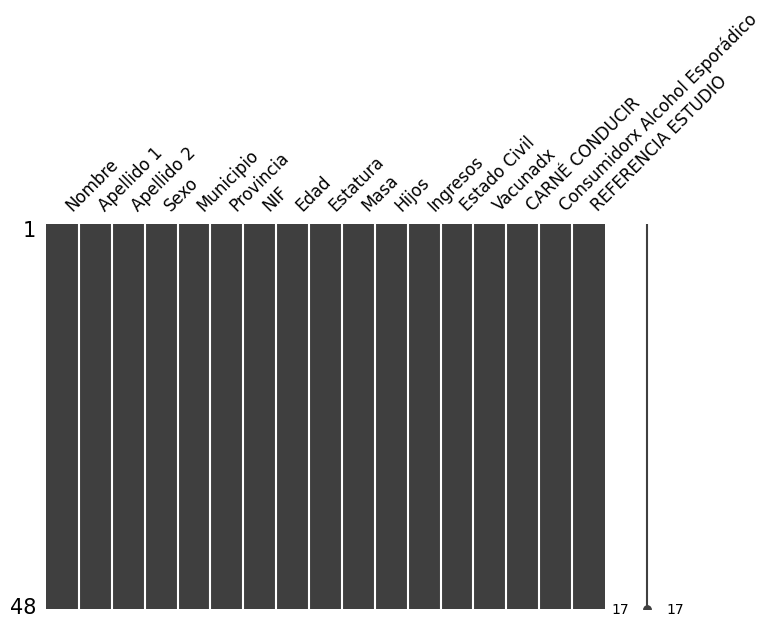

In [66]:
df = df.reset_index(drop=True)
msno.matrix(df,figsize=(8,5), fontsize=12);
df

C:\Users\usuario\AppData\Local\Temp\ipykernel_23152\961522207.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estatura_media = df.groupby(['Rango de Edad', 'Sexo'])['Estatura'].mean().unstack()


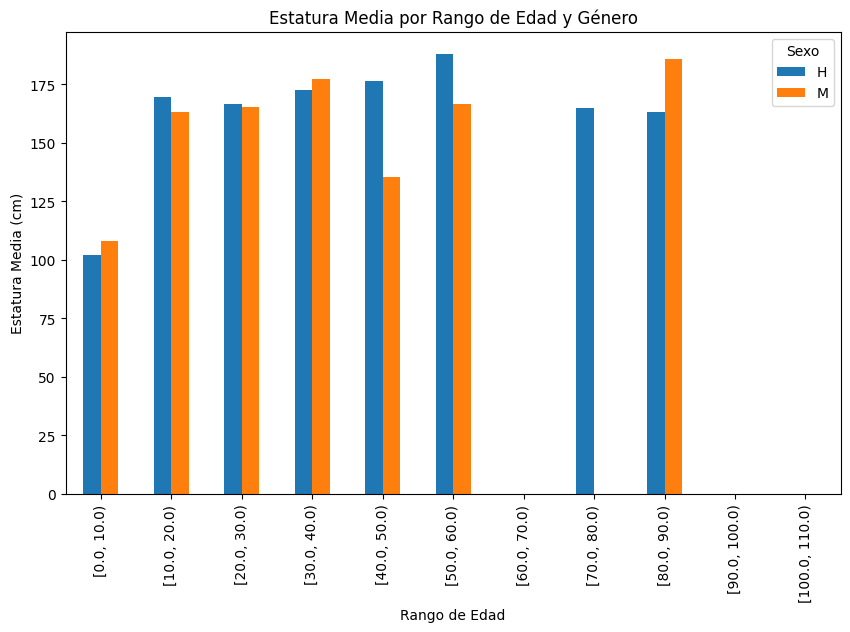

In [68]:
# Creamos una nueva columna 'Rango de Edad' basada en la edad, agrupando de 10 en 10
df['Rango de Edad'] = pd.cut(df['Edad'], bins=np.arange(0, df['Edad'].max() + 10, 10), right=False)

# Calculamos la estatura media por rango de edad y género
estatura_media = df.groupby(['Rango de Edad', 'Sexo'])['Estatura'].mean().unstack()

estatura_media.plot(kind='bar', figsize=(10,6))
plt.title('Estatura Media por Rango de Edad y Género')
plt.xlabel('Rango de Edad')
plt.ylabel('Estatura Media (cm)')
plt.show()